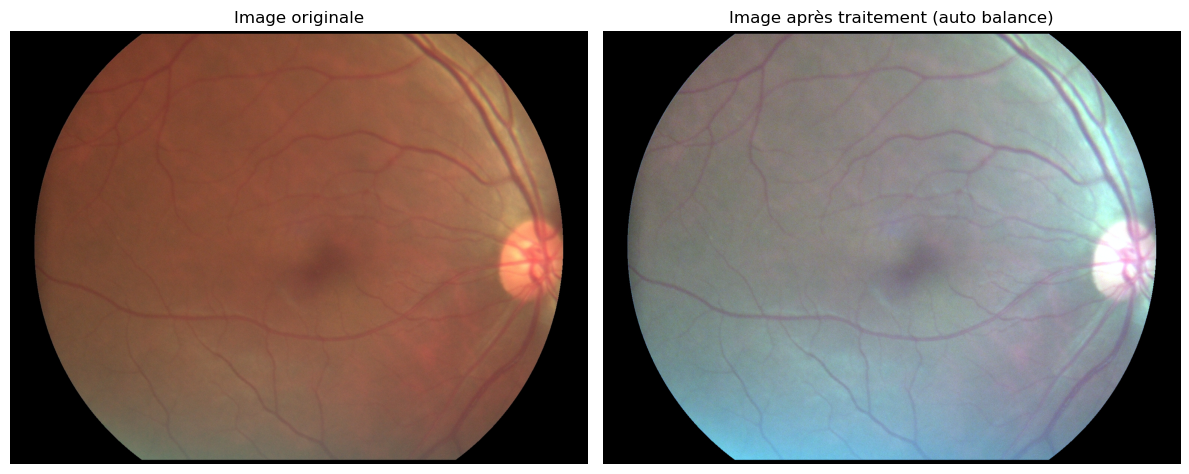

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

file_in = '../data/image_2.jpg'

img = cv2.imread(file_in)

img_out2 = np.zeros_like(img) 
for channel_index in range(3):
    hist, bins = np.histogram(img[..., channel_index].ravel(), 256, (0, 256))
    bmin = np.min(np.where(hist > (hist.sum() * 0.0005)))
    bmax = np.max(np.where(hist > (hist.sum() * 0.0005)))
    img_out2[..., channel_index] = np.clip(img[..., channel_index], bmin, bmax)
    img_out2[..., channel_index] = ((img_out2[..., channel_index] - bmin) / (bmax - bmin) * 255)

# Afficher les images seulement
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Affichage de l'image originale
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].set_title('Image originale')
axs[0].axis('off')

# Affichage de l'image après traitement 2
axs[1].imshow(cv2.cvtColor(img_out2, cv2.COLOR_BGR2RGB))
axs[1].set_title('Image après traitement (auto balance)')
axs[1].axis('off')

plt.tight_layout()
plt.show()


